In [50]:
#Chem library
from rdkit import Chem
from rdkit import DataStructs
#display libraries
from IPython.display import SVG
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d

#heap library
import heapq

#time library to measure sample time
import time

import os
print(os.listdir())

#filepath to write indexes
filepath = './index.json'

['.ipynb_checkpoints', 'chembl_27.sdf', 'index.json', 'rdkitDatabaseAnalysisScript.ipynb', 'Untitled.ipynb']


In [2]:
#loading up database
suppl = Chem.SDMolSupplier('./chembl_27.sdf')


In [3]:
def tanimoto_similarity(ms, idx):
    fps = [FingerprintMol(i) for i in ms]
    

In [9]:
print(len(suppl))
mol = suppl[0]

1941411
{}


In [4]:
# target molecule
tar = Chem.MolFromSmiles('O(c1ccc(O)cc1C(C)(C)C)C.O(c1ccc(O)c(c1)C(C)(C)C)C')

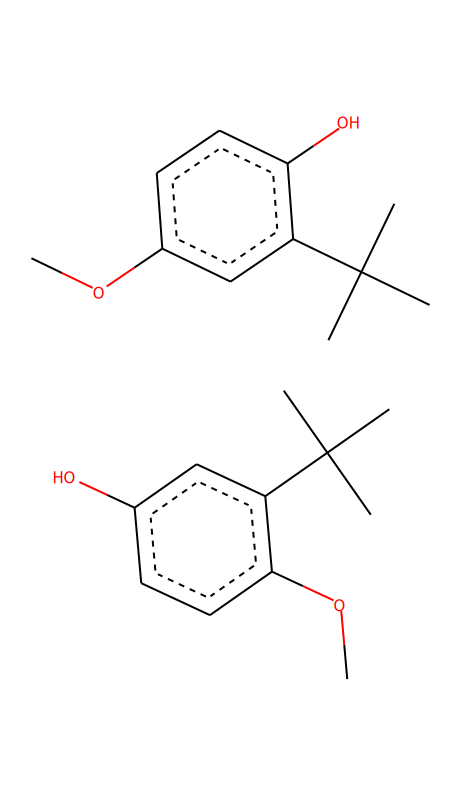

In [5]:
#drawing target molecule
if not tar.GetNumConformers():
    rdd.Compute2DCoords(tar)             # compute 2D coordinates of atoms
drawer = draw2d.MolDraw2DSVG(450,800)# initialize drawer with size
drawer.DrawMolecule(tar)                 # draw the molecule
drawer.FinishDrawing()
svg = drawer.GetDrawingText()           # get the SVG string 
display(SVG(svg.replace('svg:','')))    # fix and display in Jupyter notebook

In [17]:
#todo
#Sohil HeapMol Class
#Kayla: for loop over entire dataset( each molecule in suppl)
    #Kayla: get fingerprint (fps) using Chem.RDKFingerprint(molecule in suppl)
    #Kayla: perform Datastructs.FingerprintSimilarity(tar, fps(molecule in suppl))
    #Sohil: store 100 highest similar molecules in our array!
        #Sohil: use max-heap to store 100 highest items (for efficiency)
        #Sohil: slice off at 100th index


In [55]:
class HeapMol():
    def __init__(self, mol, sim, idx):
        self.mol = mol
        self.sim = sim
        self.idx = idx
    def __lt__(self, you):
        return self.sim > you.sim
    def __str__(self):
        return str(self.idx)
    def __repr__(self):
        return str(self.idx)

In [56]:
#testing sort and fingerprinting
tarFin = Chem.RDKFingerprint(tar)
testResult = []
t1 = time.time()
for m in range(1000):
    fps = Chem.RDKFingerprint(suppl[m])
    heapq.heappush(testResult, HeapMol(suppl[m], DataStructs.FingerprintSimilarity(tarFin, fps), m))
    if len(testResult)>100:
        testResult.sort()
        testResult.pop(-1)
    #testResult.sort()
#print(testResult)
    if (m%100==0):
        with open(filepath, 'w') as f:
            f.write(str(testResult))
t2 = time.time()
print(t2-t1)


7.751227855682373


In [57]:
tarFin = Chem.RDKFingerprint(tar)
similarity = []
for idx, m in enumerate(suppl):
    try:
        fps = Chem.RDKFingerprint(m)
        heapq.heappush(similarity, HeapMol(m, DataStructs.FingerprintSimilarity(tarFin, fps), idx))
        if len(similarity)>100:
            similarity.sort()
            similarity.pop(-1)
        if (idx%1000==0):
            with open(filepath, 'w') as f:
                f.write(str(similarity))
    except Exception as e:
        print(e)
        with open('error.json', 'w') as h:
            h.write(str(similarity))
        
print(similarity)

Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(NoneType)
did not match C++ signature:
    RDKFingerprint(class RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, class boost::python::api::object atomInvariants=0, class boost::python::api::object fromAtoms=0, class boost::python::api::object atomBits=None, class boost::python::api::object bitInfo=None)
Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(NoneType)
did not match C++ signature:
    RDKFingerprint(class RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, class boost::python::api::object atomInvariants=0, class boost::python::api::obj

In [65]:
def drawMolecule(m):
    if not m.GetNumConformers():
        rdd.Compute2DCoords(m)             # compute 2D coordinates of atoms
    drawer = draw2d.MolDraw2DSVG(450,400)# initialize drawer with size
    drawer.DrawMolecule(m)                 # draw the molecule
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()           # get the SVG string 
    print(m.GetProp('_Name'))
    display(SVG(svg.replace('svg:','')))    # fix and display in Jupyter notebook

CHEMBL4296740


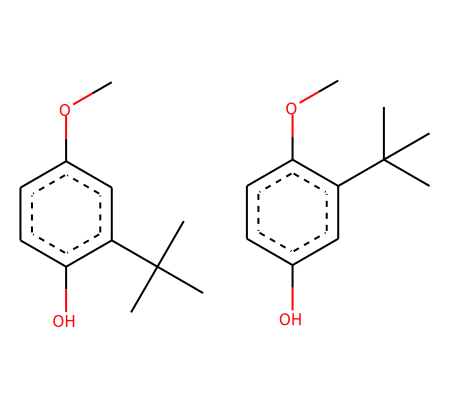

CHEMBL502074


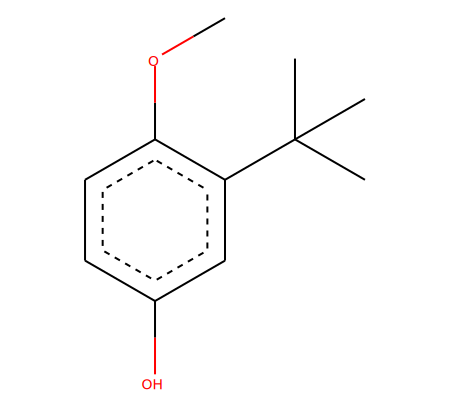

CHEMBL1600347


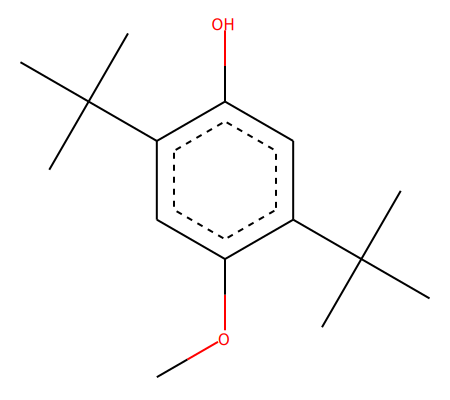

CHEMBL1795409


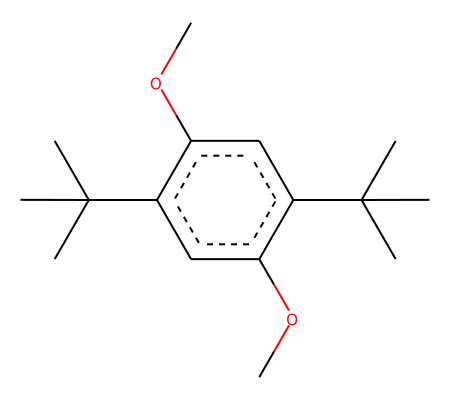

CHEMBL192451


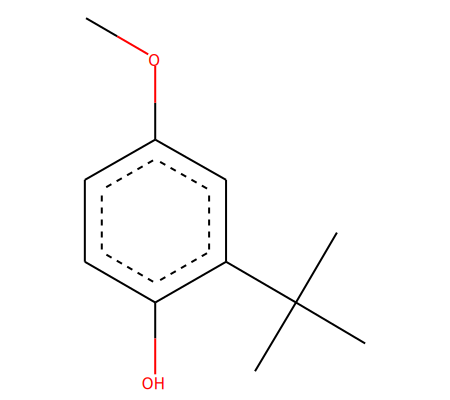

CHEMBL456933


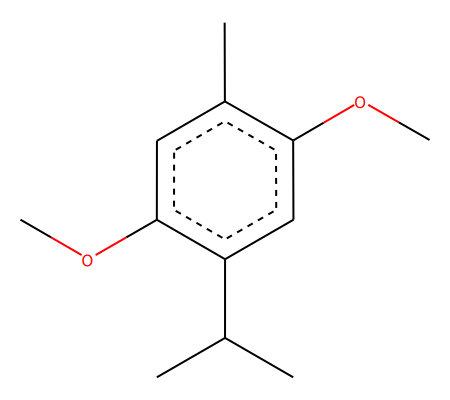

CHEMBL98253


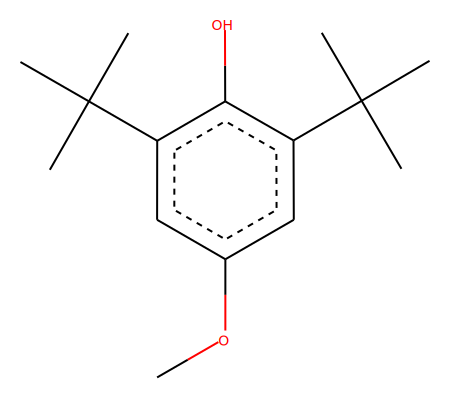

CHEMBL2424841


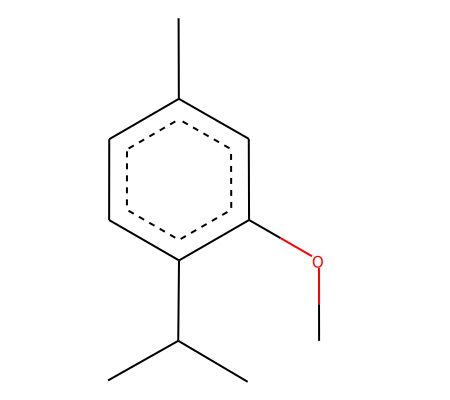

CHEMBL242080


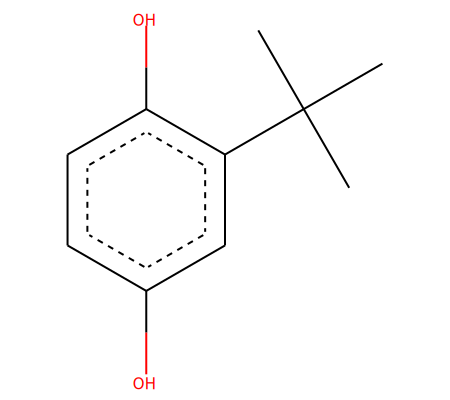

CHEMBL7507


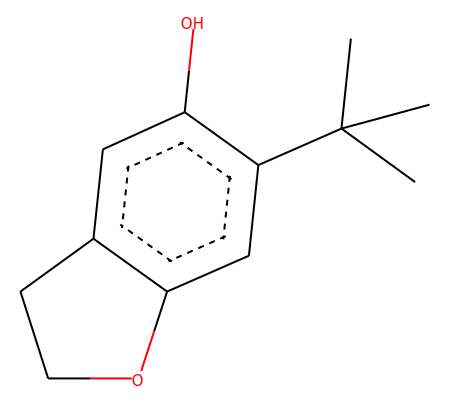

CHEMBL480626


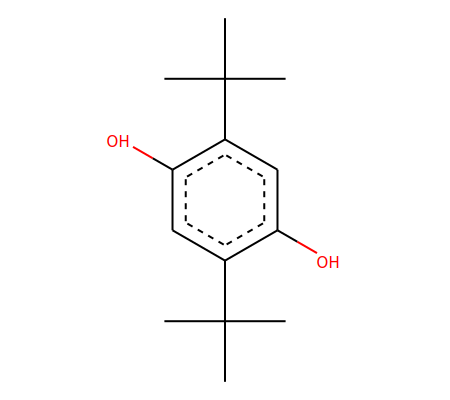

CHEMBL4214452


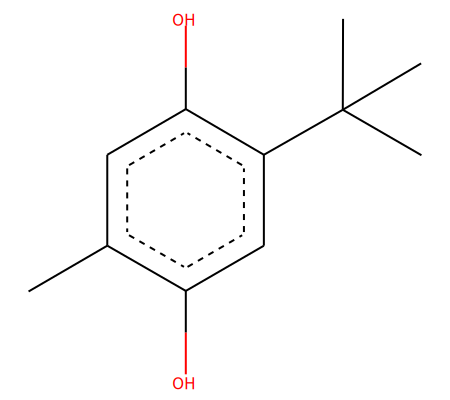

CHEMBL8317


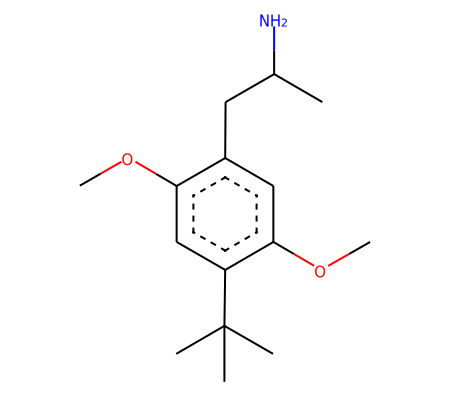

CHEMBL2271177


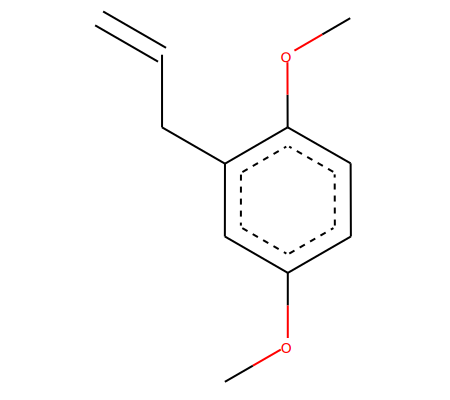

CHEMBL464709


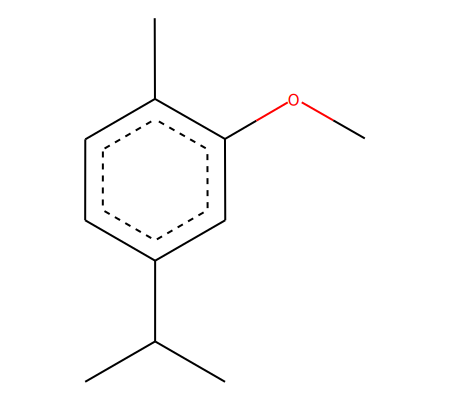

CHEMBL287047


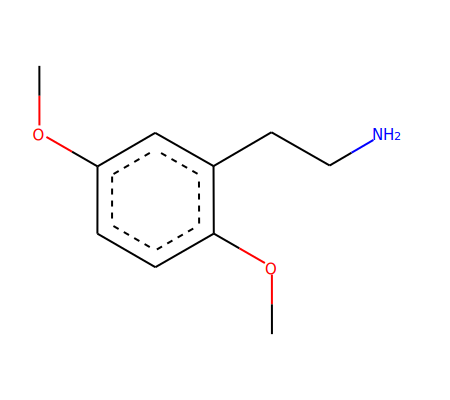

CHEMBL1795407


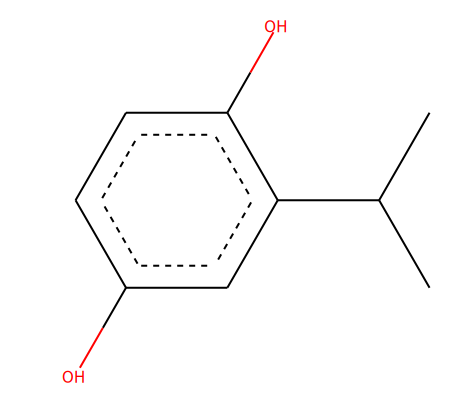

CHEMBL227764


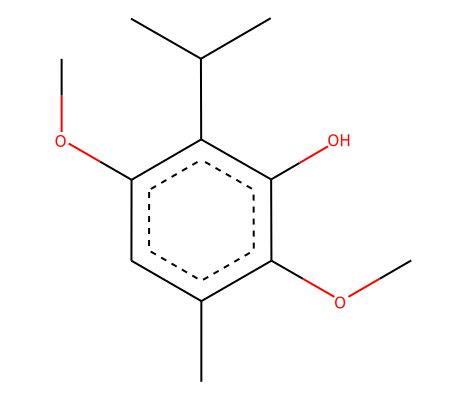

CHEMBL266592


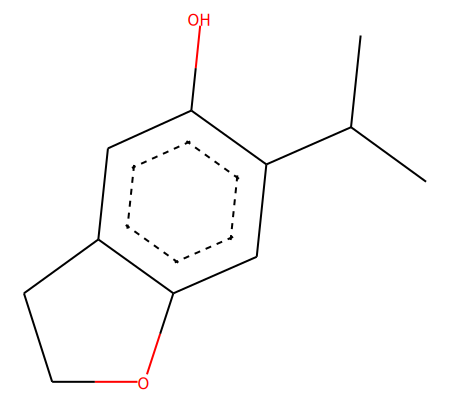

CHEMBL224198


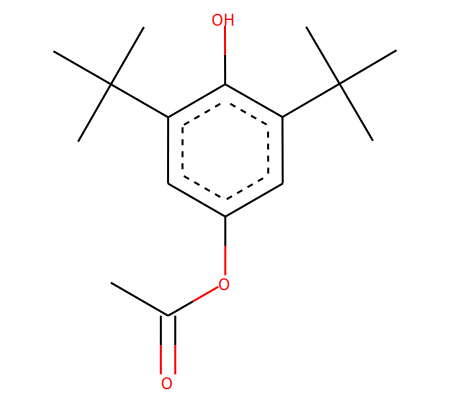

CHEMBL1625574


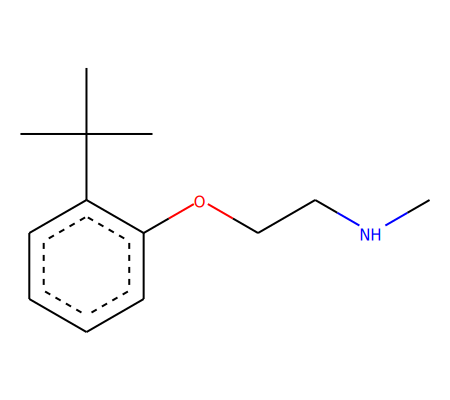

CHEMBL1795399


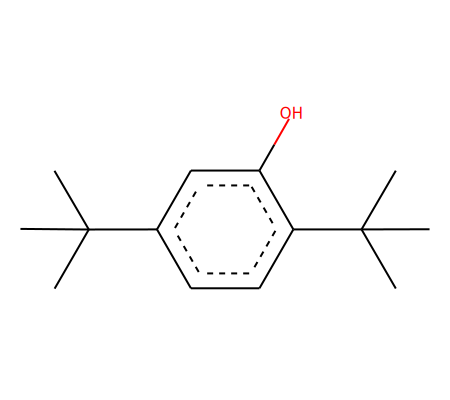

CHEMBL456975


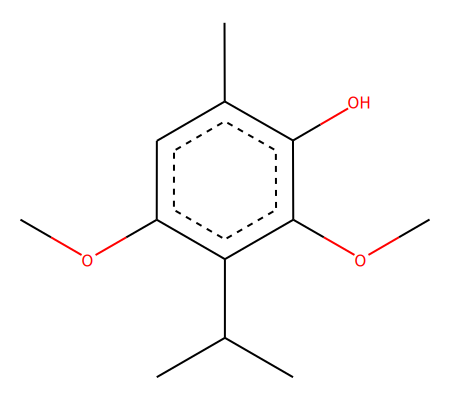

CHEMBL464710


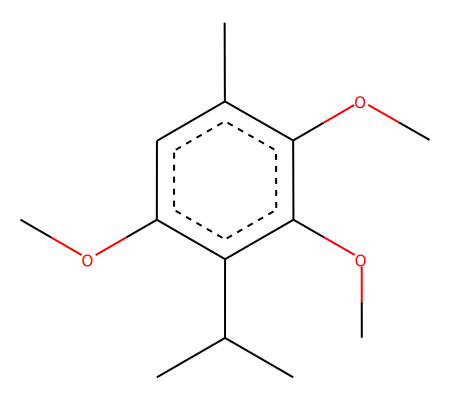

CHEMBL124049


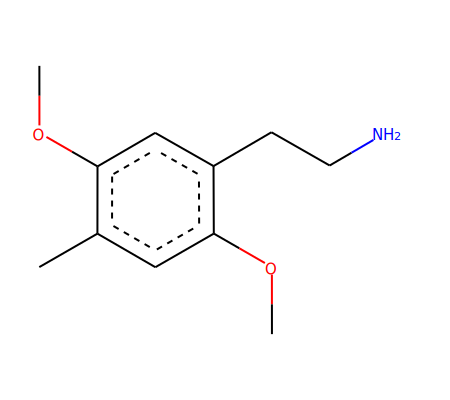

CHEMBL111361


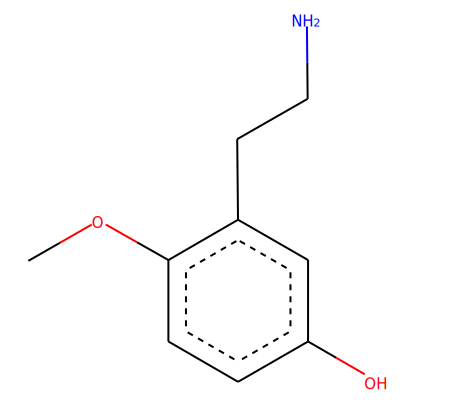

CHEMBL2271178


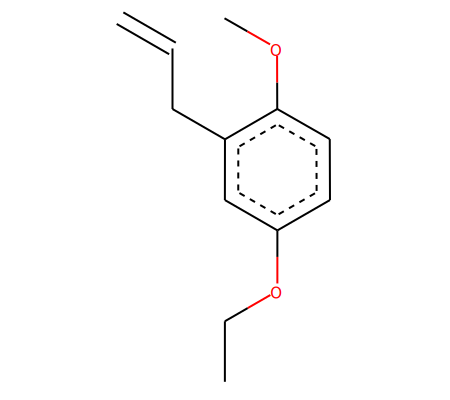

CHEMBL3248337


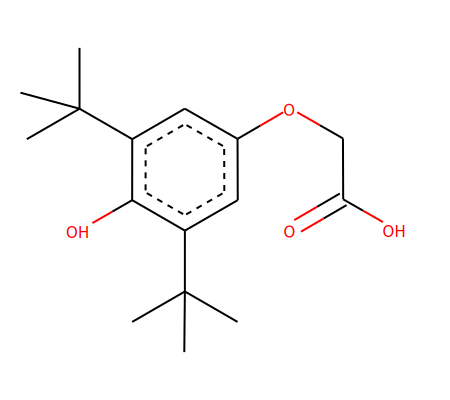

CHEMBL124063


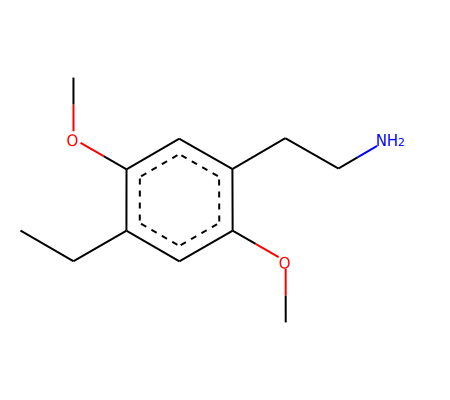

CHEMBL4073409


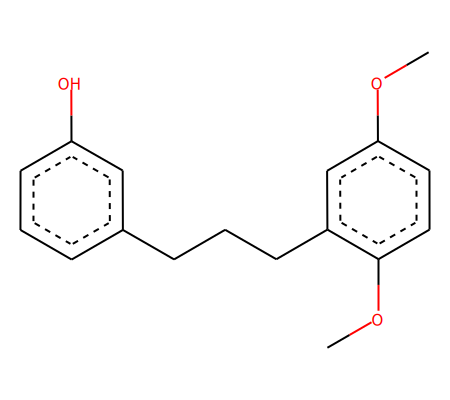

CHEMBL1616947


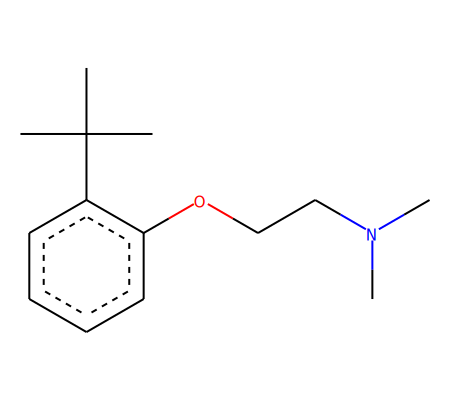

CHEMBL8237


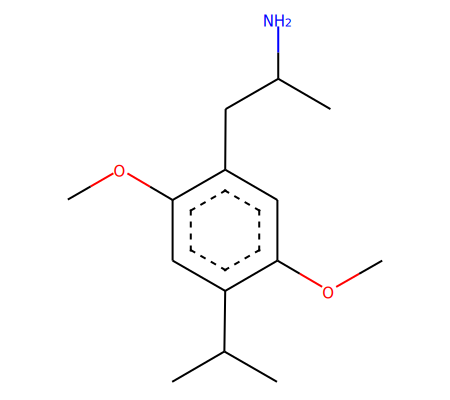

CHEMBL3415516


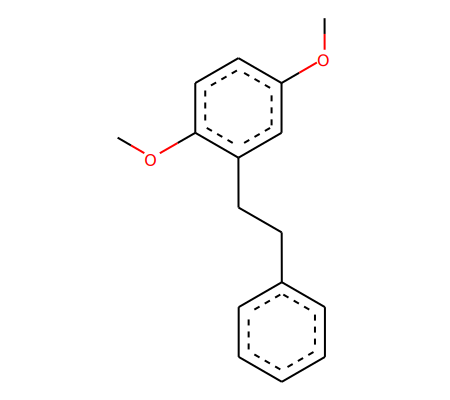

CHEMBL1373005


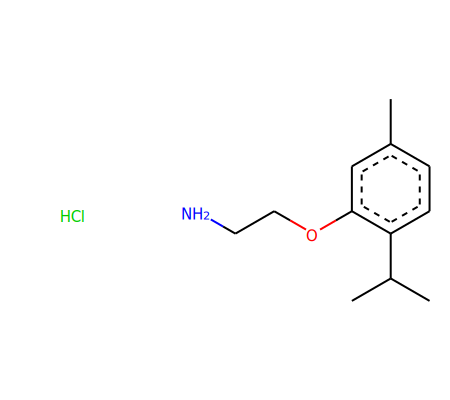

CHEMBL1618836


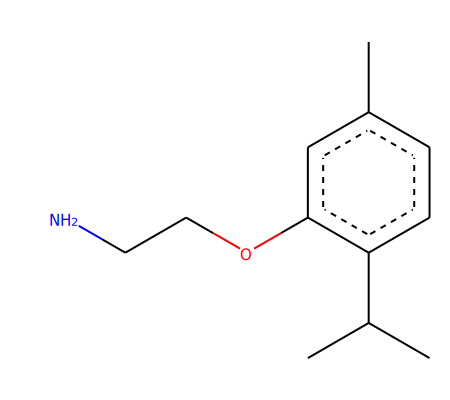

CHEMBL2271183


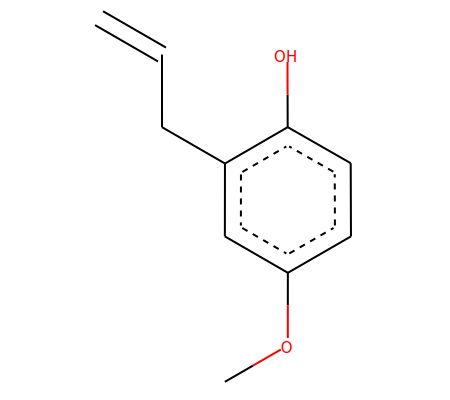

CHEMBL375695


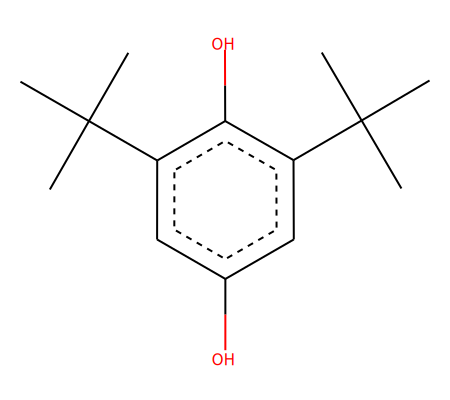

CHEMBL1966767


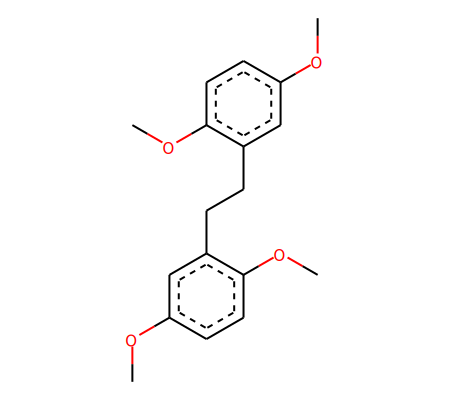

CHEMBL4204349


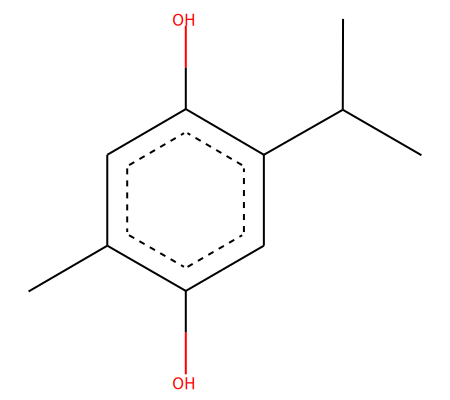

CHEMBL2270995


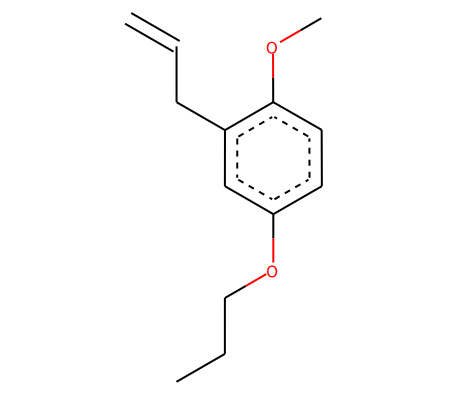

CHEMBL2270992


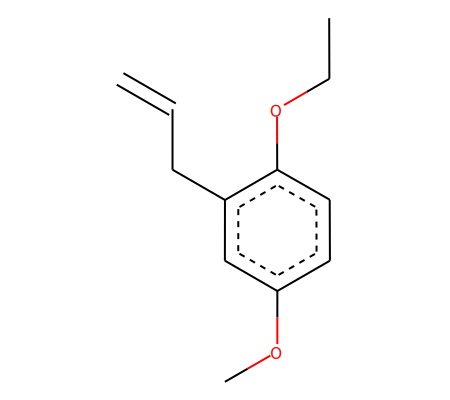

CHEMBL103779


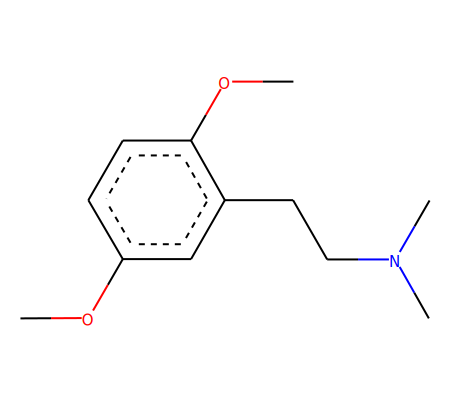

CHEMBL175204


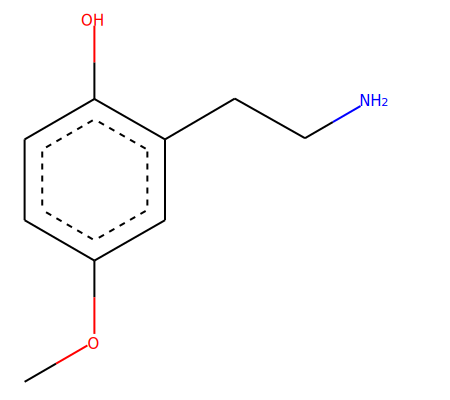

CHEMBL1602428


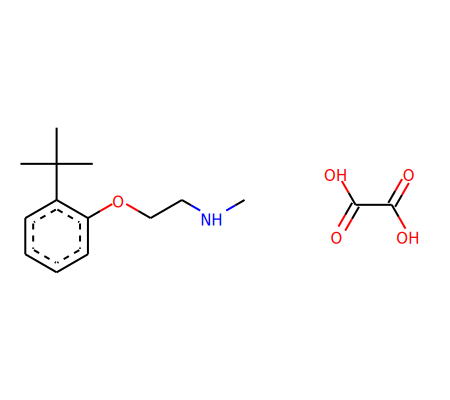

CHEMBL2270993


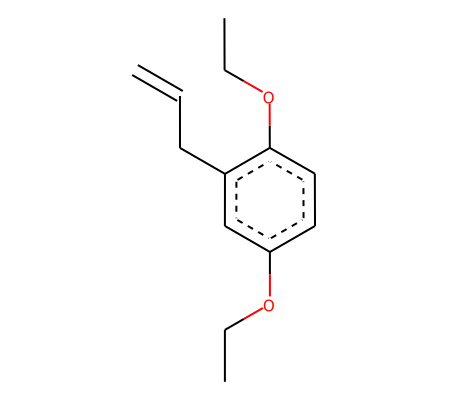

CHEMBL2270996


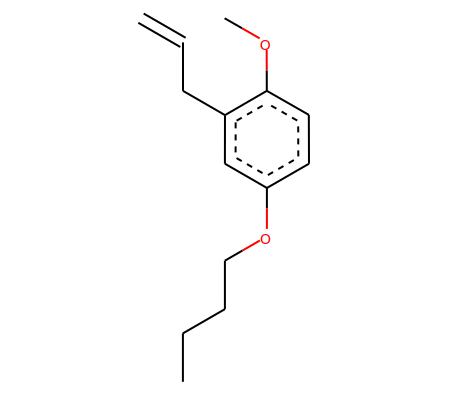

CHEMBL7879


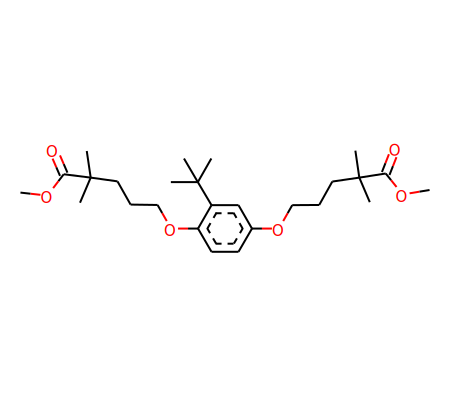

CHEMBL2270988


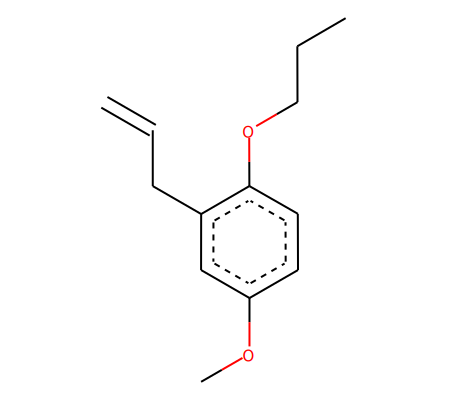

CHEMBL594921


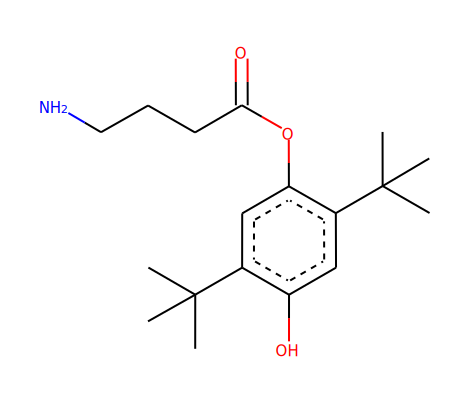

CHEMBL1568748


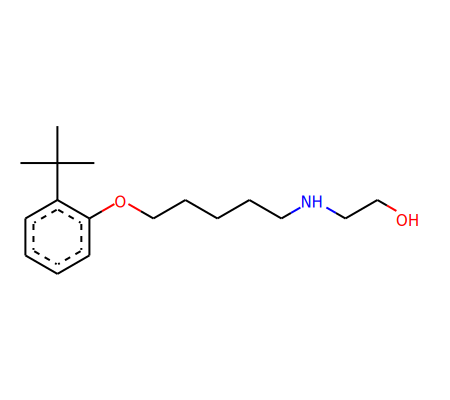

CHEMBL2270994


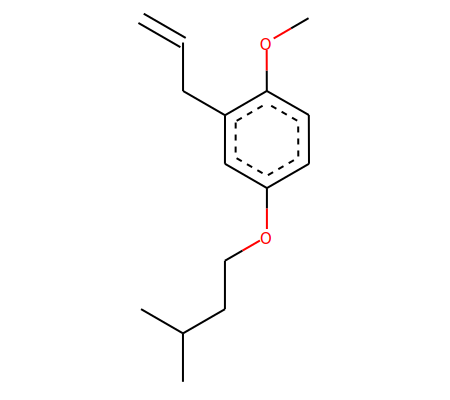

CHEMBL1477919


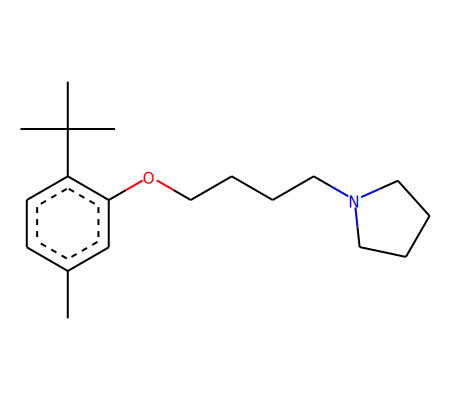

CHEMBL536019


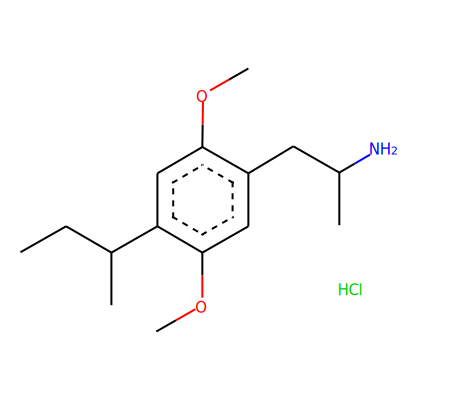

CHEMBL120116


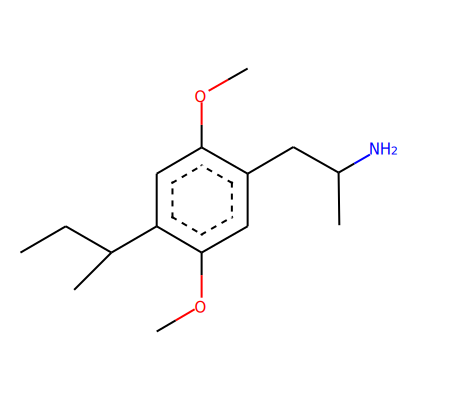

CHEMBL119924


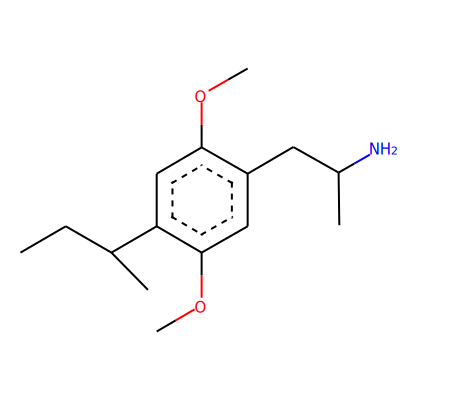

CHEMBL332535


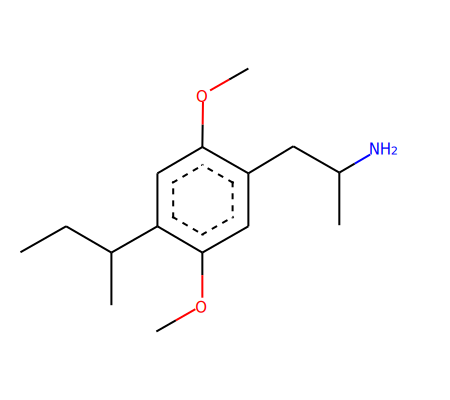

CHEMBL1371040


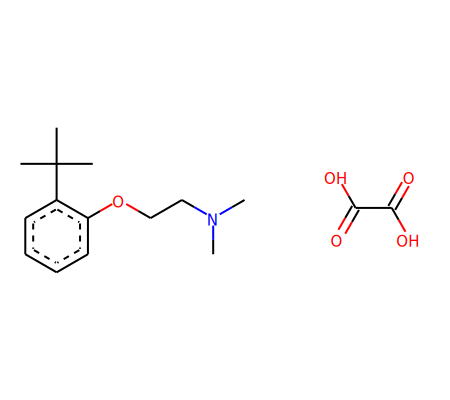

CHEMBL1256739


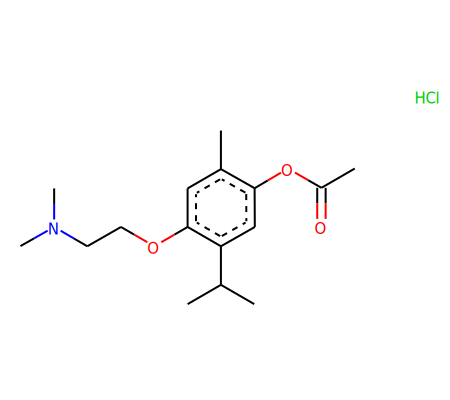

CHEMBL159226


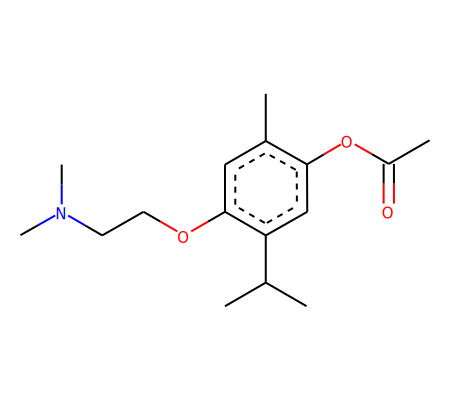

CHEMBL1624619


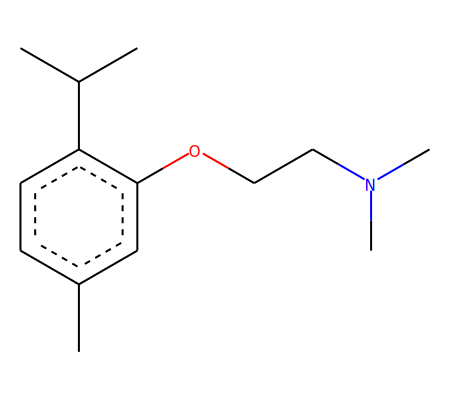

CHEMBL2270991


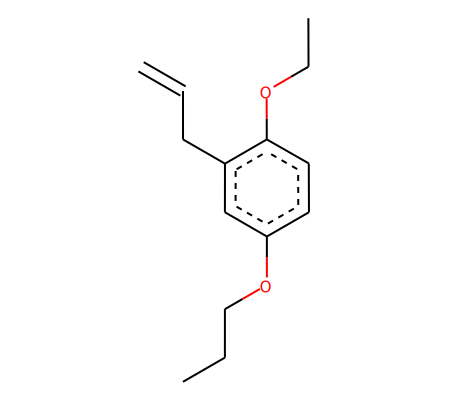

CHEMBL1587250


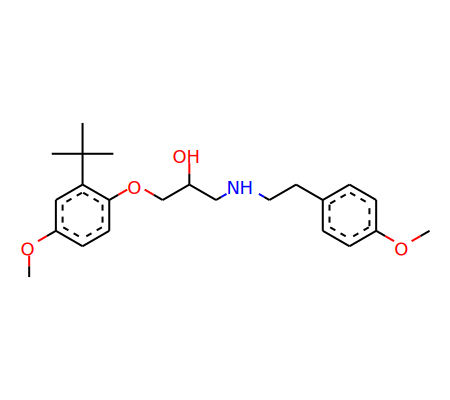

CHEMBL57541


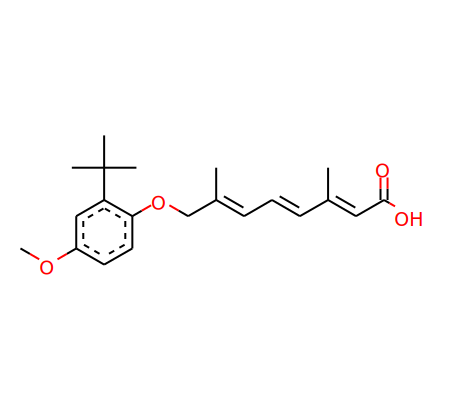

CHEMBL2270989


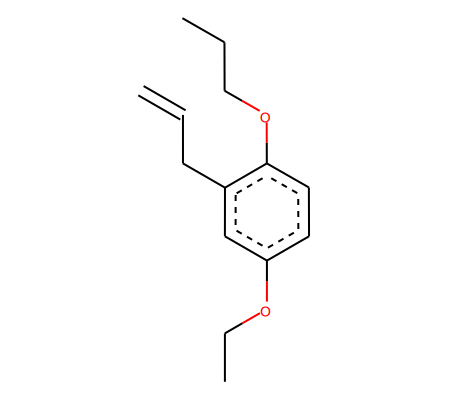

CHEMBL2270984


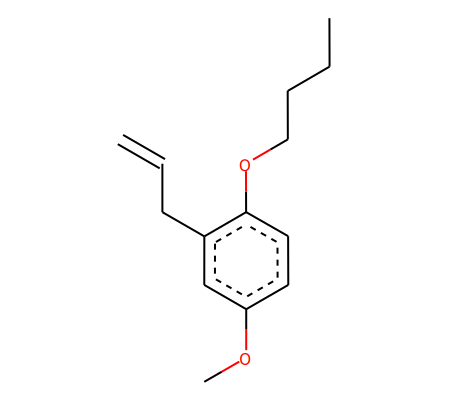

CHEMBL1548044


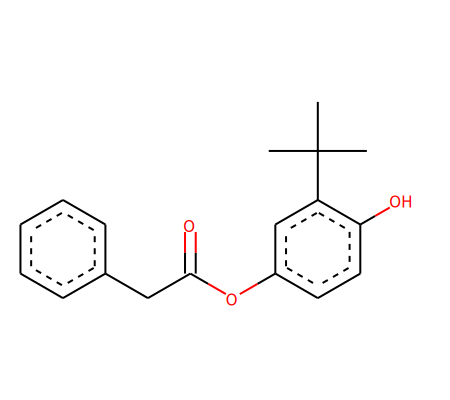

CHEMBL207321


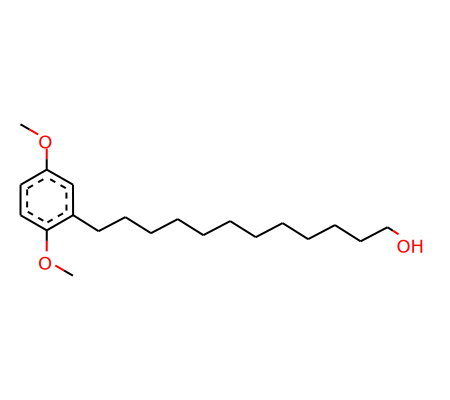

CHEMBL208624


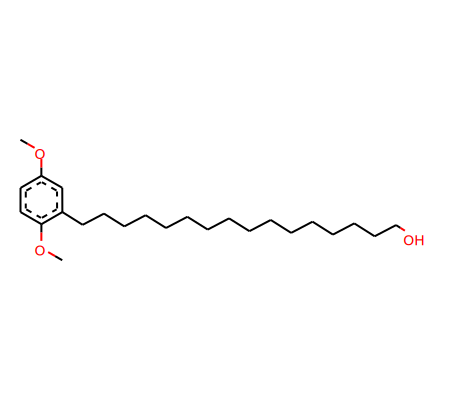

CHEMBL207127


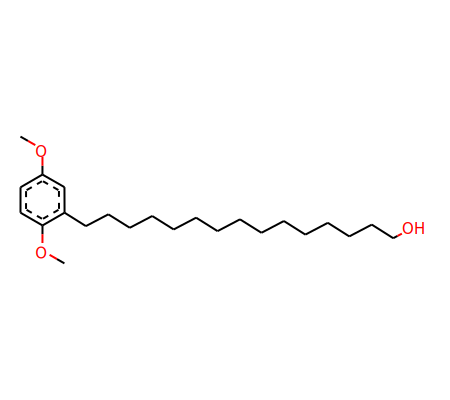

CHEMBL208676


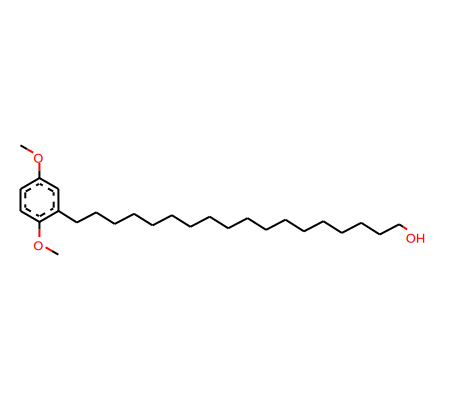

CHEMBL381188


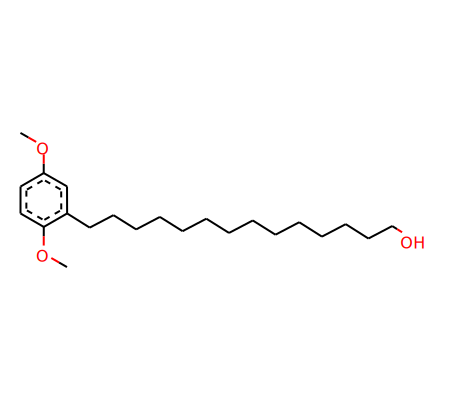

CHEMBL1880057


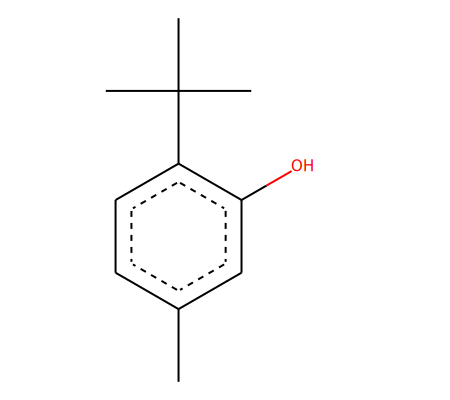

CHEMBL2270987


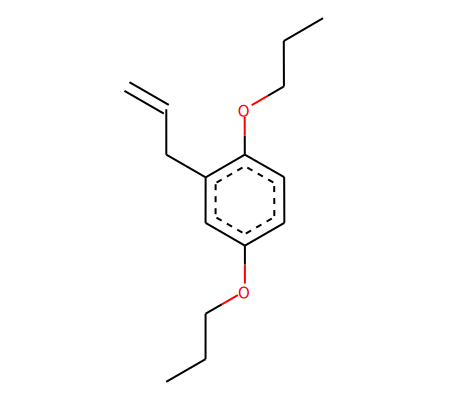

CHEMBL1382386


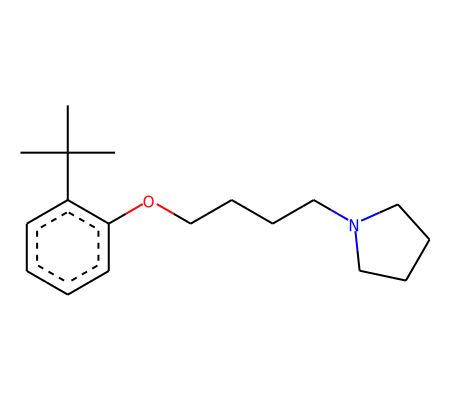

CHEMBL477021


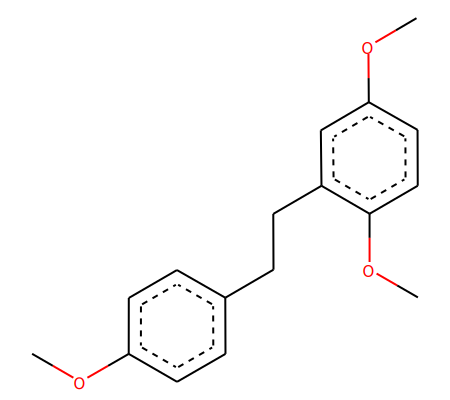

CHEMBL3277224


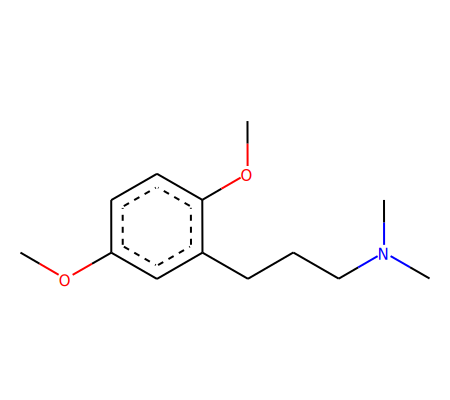

CHEMBL2270980


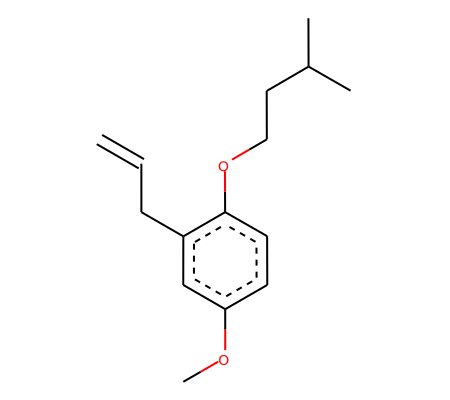

CHEMBL2268510


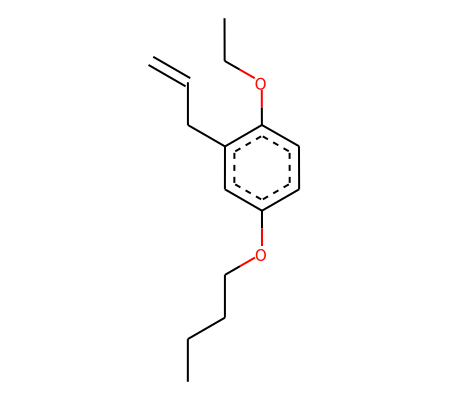

CHEMBL2271181


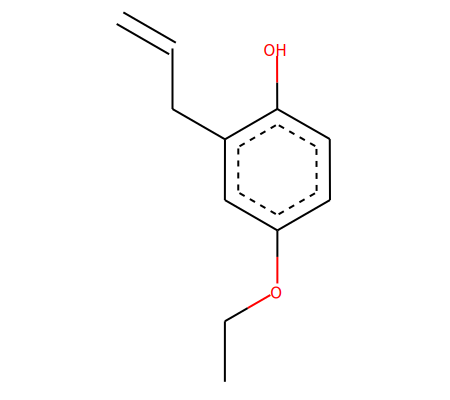

CHEMBL434788


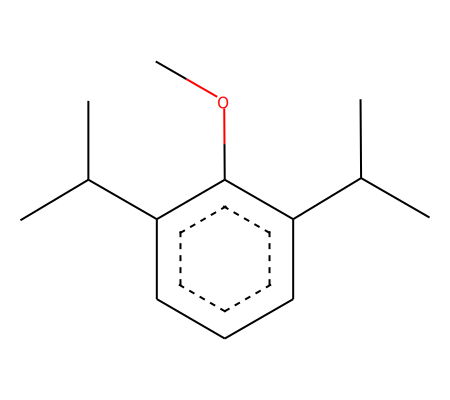

CHEMBL2270974


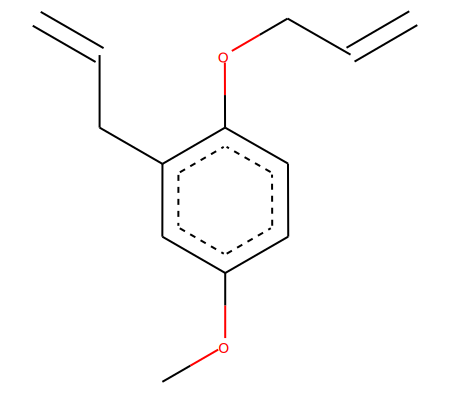

CHEMBL1797942


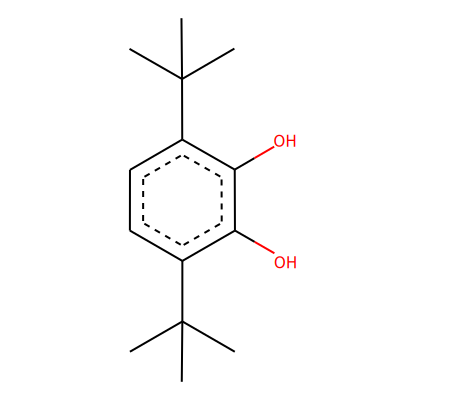

CHEMBL2270982


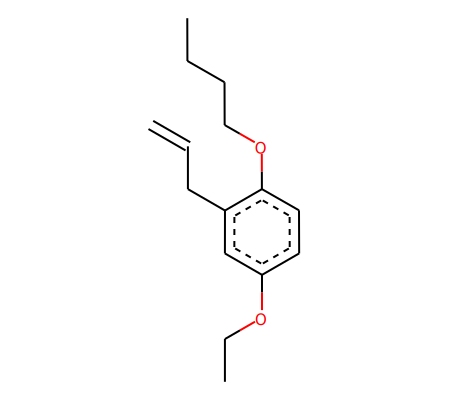

CHEMBL63006


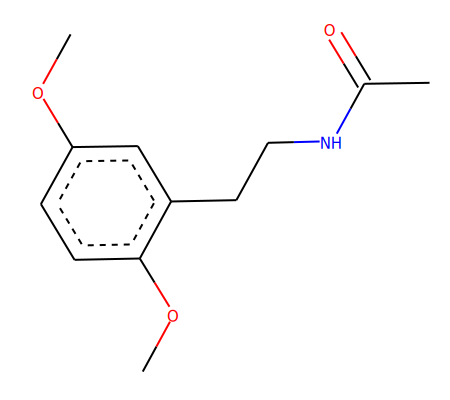

CHEMBL1701660


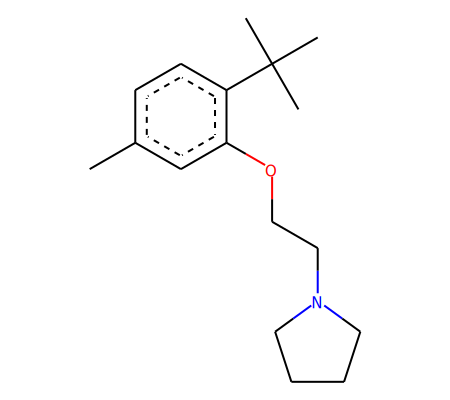

CHEMBL1193531


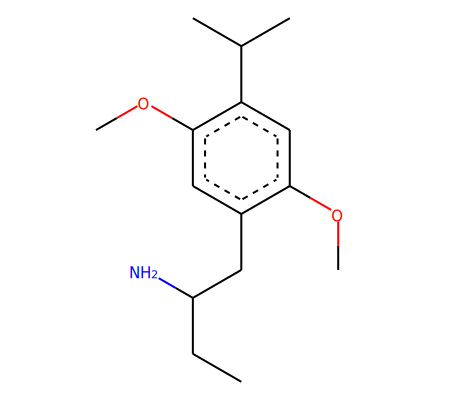

CHEMBL544954


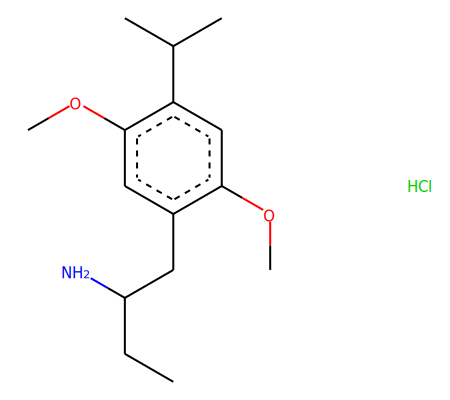

CHEMBL3084329


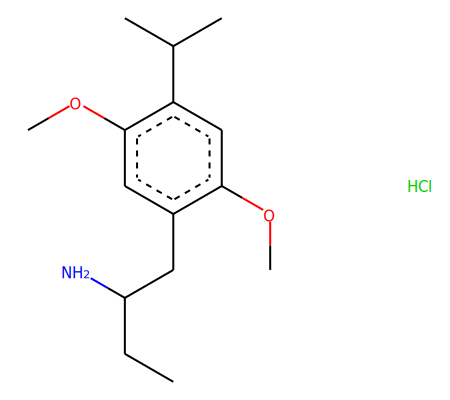

CHEMBL3139226


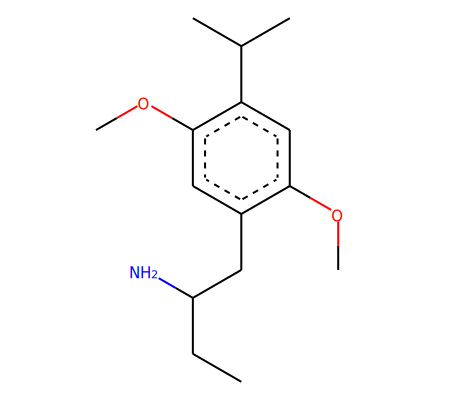

CHEMBL2270985


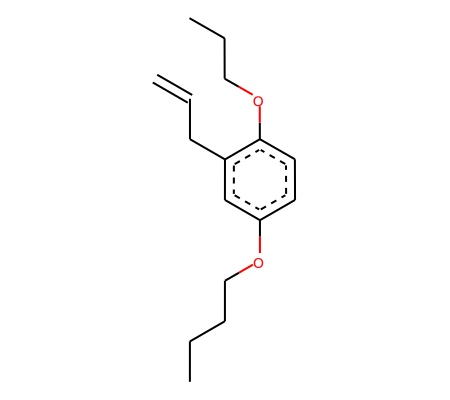

CHEMBL108851


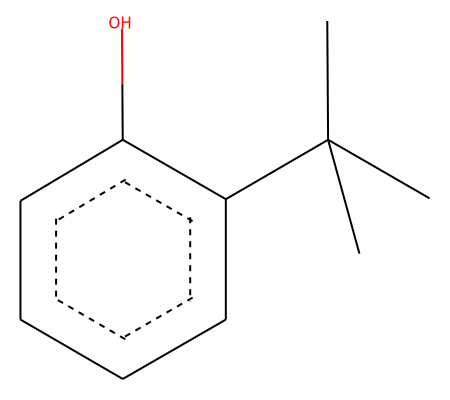

CHEMBL2270990


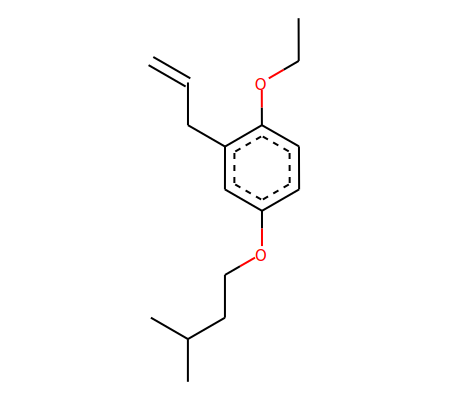

CHEMBL2270981


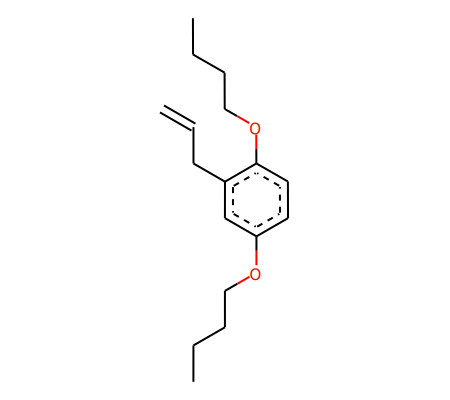

CHEMBL2270983


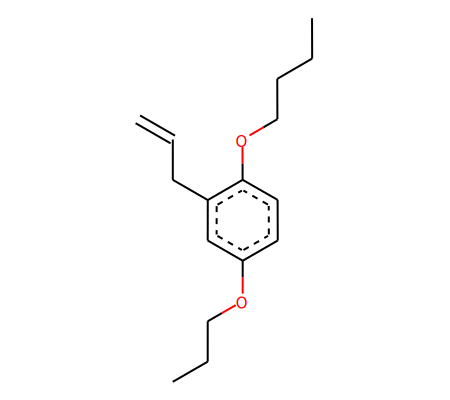

CHEMBL508246


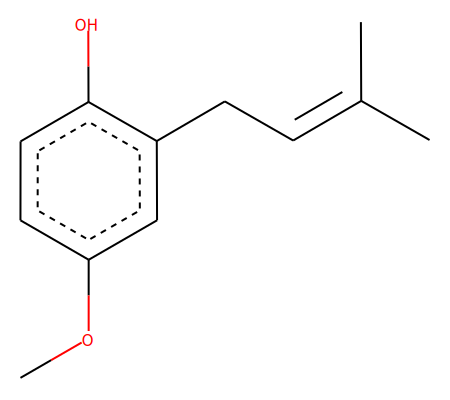

CHEMBL268390


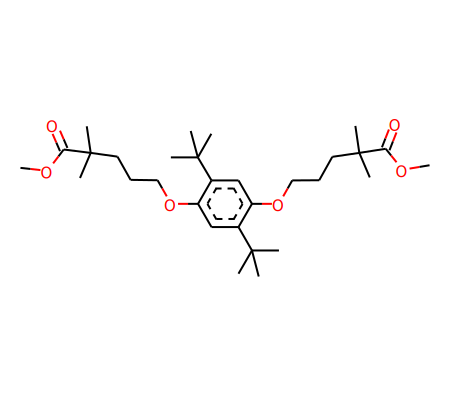

CHEMBL3343661


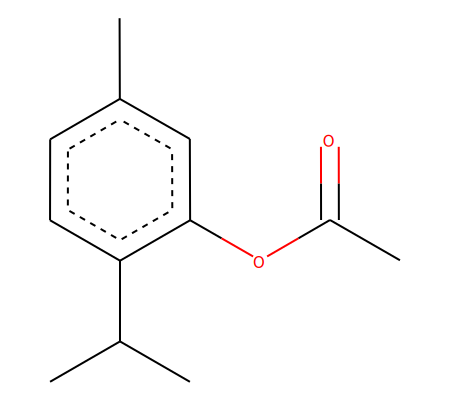

CHEMBL355192


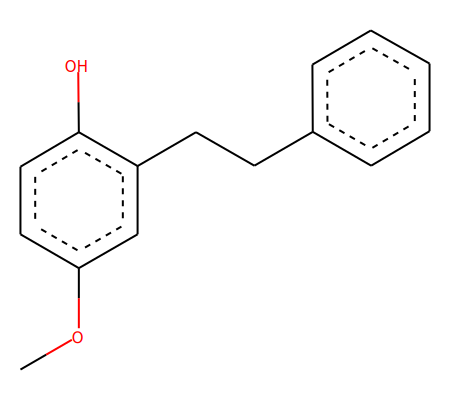

CHEMBL2270978


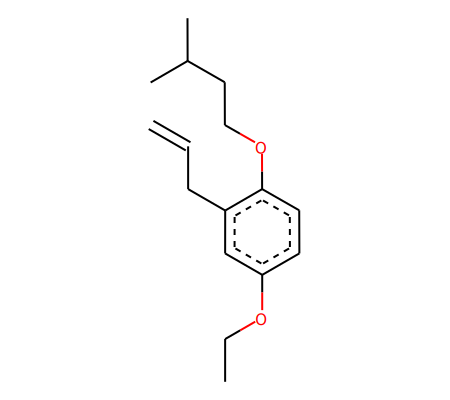

CHEMBL2270973


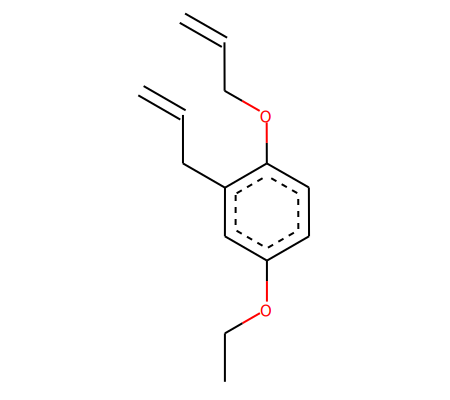

In [66]:
for i in similarity:
    drawMolecule(i.mol)